In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [2]:
plt.rcParams.update({'font.size': 20})

# Problem#1 Newman 6.13: Wien’s displacement constant, binary search

According to Planck’s radiation law Intensity of radiation per unit area and per unit
wavelength λ from a black body at temperature T is:
$$I(\lambda)=\frac{2\pi hc^2\lambda^{-5}}{e^{hc/\lambda k_BT}-1}$$

$\textbf{Part a}$
\
Differentiating $I(\lambda)$:
$$\frac{dI(\lambda)}{d\lambda}=\frac{-10\pi hc^2\lambda^{-6}}{(e^{hc/\lambda k_BT}-1)}-\frac{2\pi hc^2\lambda^{-5}}{(e^{hc/\lambda k_BT}-1)^2}\left(-\frac{hc}{\lambda^2k_BT}\right)e^{hc/\lambda k_BT}$$
\
\
$$\frac{dI(\lambda)}{d\lambda}=\left(\frac{2\pi hc^2\lambda^{-6}}{(e^{hc/\lambda k_BT}-1)^2}\right)\left(-5(e^{hc/\lambda k_BT}-1)+\left(\frac{hc}{\lambda k_BT}\right)e^{hc/\lambda k_BT}\right)$$


$$\frac{dI(\lambda)}{d\lambda}=\left(-\frac{2\pi hc^2\lambda^{-6}}{{(e^{hc/\lambda k_BT}-1})^2}\right)\left(5-5e^{hc/\lambda k_BT}+\left(\frac{hc}{\lambda k_BT}\right)e^{hc/\lambda k_BT}\right)$$

$$\frac{dI(\lambda)}{d\lambda}=\left(-\frac{2\pi hc^2\lambda^{-6}e^{hc/\lambda k_BT}}{{(e^{hc/\lambda k_BT}-1})^2}\right)\left(5e^{-hc/\lambda k_BT}-5+\frac{hc}{\lambda k_BT}\right)$$

To get maximum intensity $$\frac{dI(\lambda)}{d\lambda}=0$$
\
As $\lambda$ is non-zero so the first term will not be zero, therefore equating the second term to zero,
\
\
$$5e^{-hc/\lambda k_BT}+\frac{hc}{\lambda k_BT}-5=0\hspace{60mm}(1)$$


Substituting $$x=\frac{hc}{\lambda k_BT}\hspace{90mm}(2)$$ 
\
The above equation will be: 

$$5e^{-x}+x-5=0\hspace{80mm}(3)$$

As according to the problem given, $x$ is the solution of the equation $(3)$. Now rearranging $(2)$ to know the value of $\lambda$ in term of $x$ will give us:
$$\lambda=\frac{hc}{k_BTx}\hspace{90mm}(4)$$
As $hc/k_Bx$ is defined as $b$ so the equation (4) would be:
$$\boxed{\lambda=\frac{b}{T}}\hspace{100mm}(4a)$$

$\textbf{Part b}$
\
Here equation $(3)$ is of the form $f(x)=0$. To solve this using binary search let's plot $(3)$ to figure out the interval $[x_1,x_2]$ 

In [3]:
##Defining f(x) first:
def f(x):
    return 5*np.exp(-x)+x-5

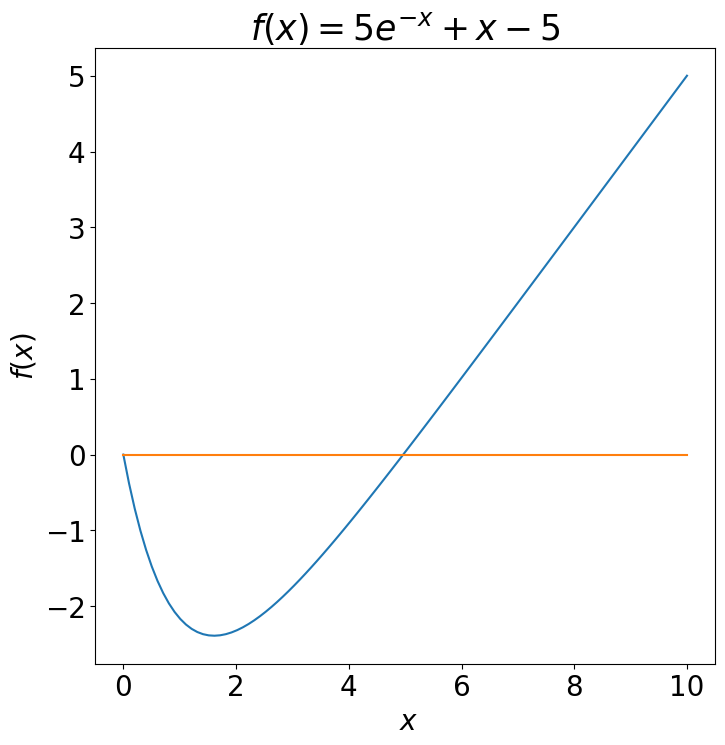

In [4]:
fig = plt.figure(figsize=(8,8))
plt.xlabel(" $x$ ")
plt.ylabel('$f(x)$')
plt.title('$f(x)=5e^{-x}+x-5$', fontsize=25)
x_x=[]
y_x=[]
y_0=[]              ### to plot a horizontal line at f(x)=0

for i in np.linspace(0,10,100):
    x_x.append(i)
    y_x.append(f(i))
    y_0.append(0)
plt.plot(x_x,y_x)
plt.plot(x_x,y_0)
plt.show()

Now let's do binary search to figure out roots of our function $f(x)$

In [5]:
##Binary search method
epsilon=1e-6
x_1=4
x_2=6
iterations=0
print('Initial search interval is [',x_1,x_2,']')
while abs(x_2-x_1) >= epsilon:
    mid_point=(x_1+x_2)/2.0
    if np.sign(f(mid_point))==np.sign(f(x_1)):
        x_1=mid_point
    else:
        x_2=mid_point
    iterations+= 1
    print('In iteration',iterations,' search interval is [',x_1,',',x_2,']')
print('Number of iterations =', iterations)
x_final=(x_1+x_2)/2.0     ###final solution is the mid-point of the last interval
print('Final Solution = ',x_final)

Initial search interval is [ 4 6 ]
In iteration 1  search interval is [ 4 , 5.0 ]
In iteration 2  search interval is [ 4.5 , 5.0 ]
In iteration 3  search interval is [ 4.75 , 5.0 ]
In iteration 4  search interval is [ 4.875 , 5.0 ]
In iteration 5  search interval is [ 4.9375 , 5.0 ]
In iteration 6  search interval is [ 4.9375 , 4.96875 ]
In iteration 7  search interval is [ 4.953125 , 4.96875 ]
In iteration 8  search interval is [ 4.9609375 , 4.96875 ]
In iteration 9  search interval is [ 4.96484375 , 4.96875 ]
In iteration 10  search interval is [ 4.96484375 , 4.966796875 ]
In iteration 11  search interval is [ 4.96484375 , 4.9658203125 ]
In iteration 12  search interval is [ 4.96484375 , 4.96533203125 ]
In iteration 13  search interval is [ 4.965087890625 , 4.96533203125 ]
In iteration 14  search interval is [ 4.965087890625 , 4.9652099609375 ]
In iteration 15  search interval is [ 4.965087890625 , 4.96514892578125 ]
In iteration 16  search interval is [ 4.965087890625 , 4.9651184082

So $x=4.965114116668701$ is the solution to the equation $(3)$, therefore using $b=hc/k_Bx$ the value of b would be:

In [6]:
## Calculating displacement constant b
from scipy.constants import h,c,k
x=x_final
b=(h*c)/(k*x)
print('Displacement constant b =',b)

Displacement constant b = 0.0028977720223463226


$\textbf{Part c}$
\
Estimating surface temperature of the sun using the calculated value of $b$ above and the wavelength given in the problem $\lambda=502\times10^{-9}$. Using equation $(4a)$:
$$T=b/\lambda$$

In [7]:
##Calculating surface temperature of sun
Lambda=502e-9
T=b/Lambda
print('Surface temperature of sun (T) =',T,' kelvin')

Surface temperature of sun (T) = 5772.454227781519  kelvin


If I search surface Temperature of the sun, then on Wikipedia it is showing $5778$ kelvin, beacuse I am using all the constants imported from scipy and their value of c is not $3\times10^{8}$ so just to check let's calculate again:

In [8]:
### Using c =3e8
T_2=(h*3e8)/(k*x*Lambda)
print('Using c=3e8 surface temperature of sun is ',T_2,' kelvin')

Using c=3e8 surface temperature of sun is  5776.450414688069  kelvin


Now I can't say which is better approximation. If Wikipedia has correct value then rest of the difference in the value of $T$ might be due to approximate value of $x$. But I don't see any parameter or evidence to claim either one of the value of T. From my perspective both are equally correct. Maybe scipy has more precise value of $c$ and than Wikipedia , then my first calculate value for T is correct.\
Also, as you said in your office hour, it's a very simplest model to calculate surface temperature of the sun an error of 5K is not significant here.

$\textbf{Part d}$

Another method we studied that can be used to solve this equation is Newton's method.\
$\textbf{Advantage of Binary search over Newton's method:}$  Binary search gaurantees to find the solution. In Newton Method, like the example given in textbook; figure 6.7 Newton's Method can send you in wrong direction (away from the roots), you could keep oscillating around the same valley. Also, Binary search doesn't require us to find the differential of the function while in Newton's method we need to know the differential which is sometimes not easy to know.

$\textbf{Disadvantage of Binary search over Newton's method:}$ If drivative of a functions abobe x=0 axis is not changing sign like it does in figure 6.7 of textbook, convergence rate of binary serach is slower than Newton's method. So in other cases, Newton's method speed up for finding roots significantly faster than Binary search.

# Problem# 2. Newman 6.15: The roots of a polynomial

$\textbf{Part a}$
\
$$P(x)=924x^6-2772x^5+3150x^4-1680x^3+420x^2-42x+1$$

Plotting $P(x)$ from $x = 0$ to $x = 1$ and finding roots by inspecting the function in the plot

In [9]:
def P(x):
    return 924*x**6-2772*x**5+3150*x**4-1680*x**3+420*x**2-42*x+1

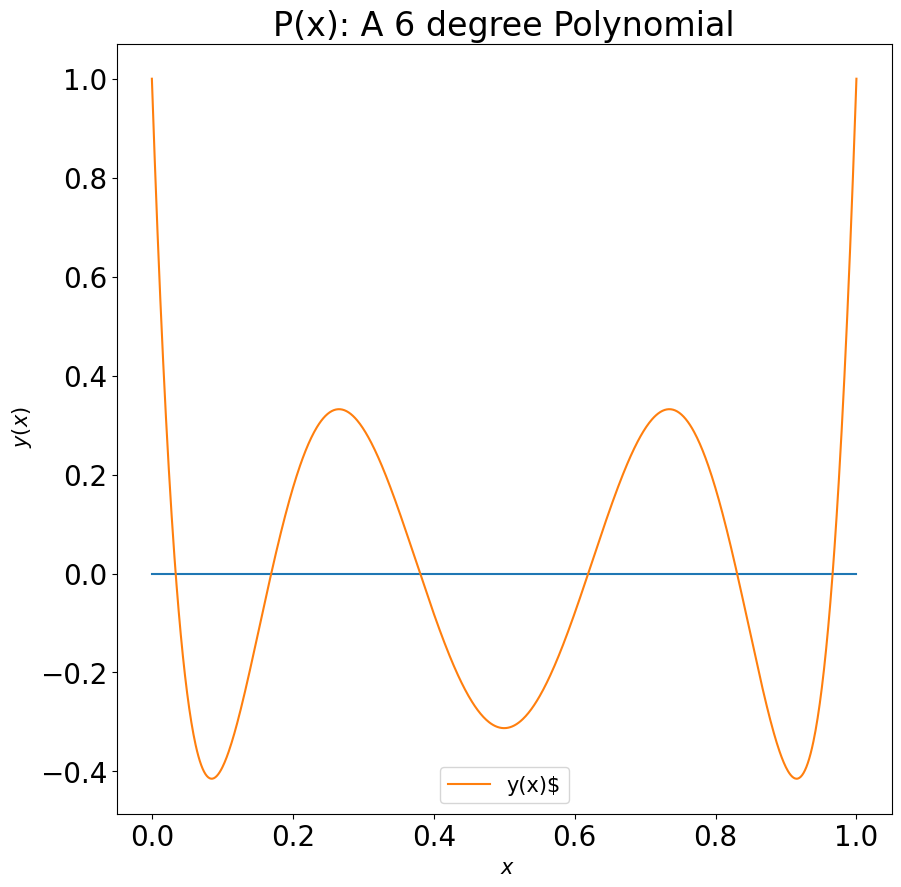

In [10]:
##Now plotting the function
y=[]
x_axis=[]
y_line=[]     ### Ploting a horizontal line y=0
for x in np.linspace(0,1,1000):
    x_axis.append(x)
    y.append(P(x))
    y_line.append(x-x)
fig = plt.figure(figsize=(10,10))
plt.plot(x_axis,y_line)
plt.plot(x_axis,y,label='y(x)$')
plt.xlabel(" $x$ ",fontsize=15)
plt.ylabel(" $y(x)$ ",fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('P(x): A 6 degree Polynomial')
plt.show()

I can better inspect this function by ploting each region where function goes to zero

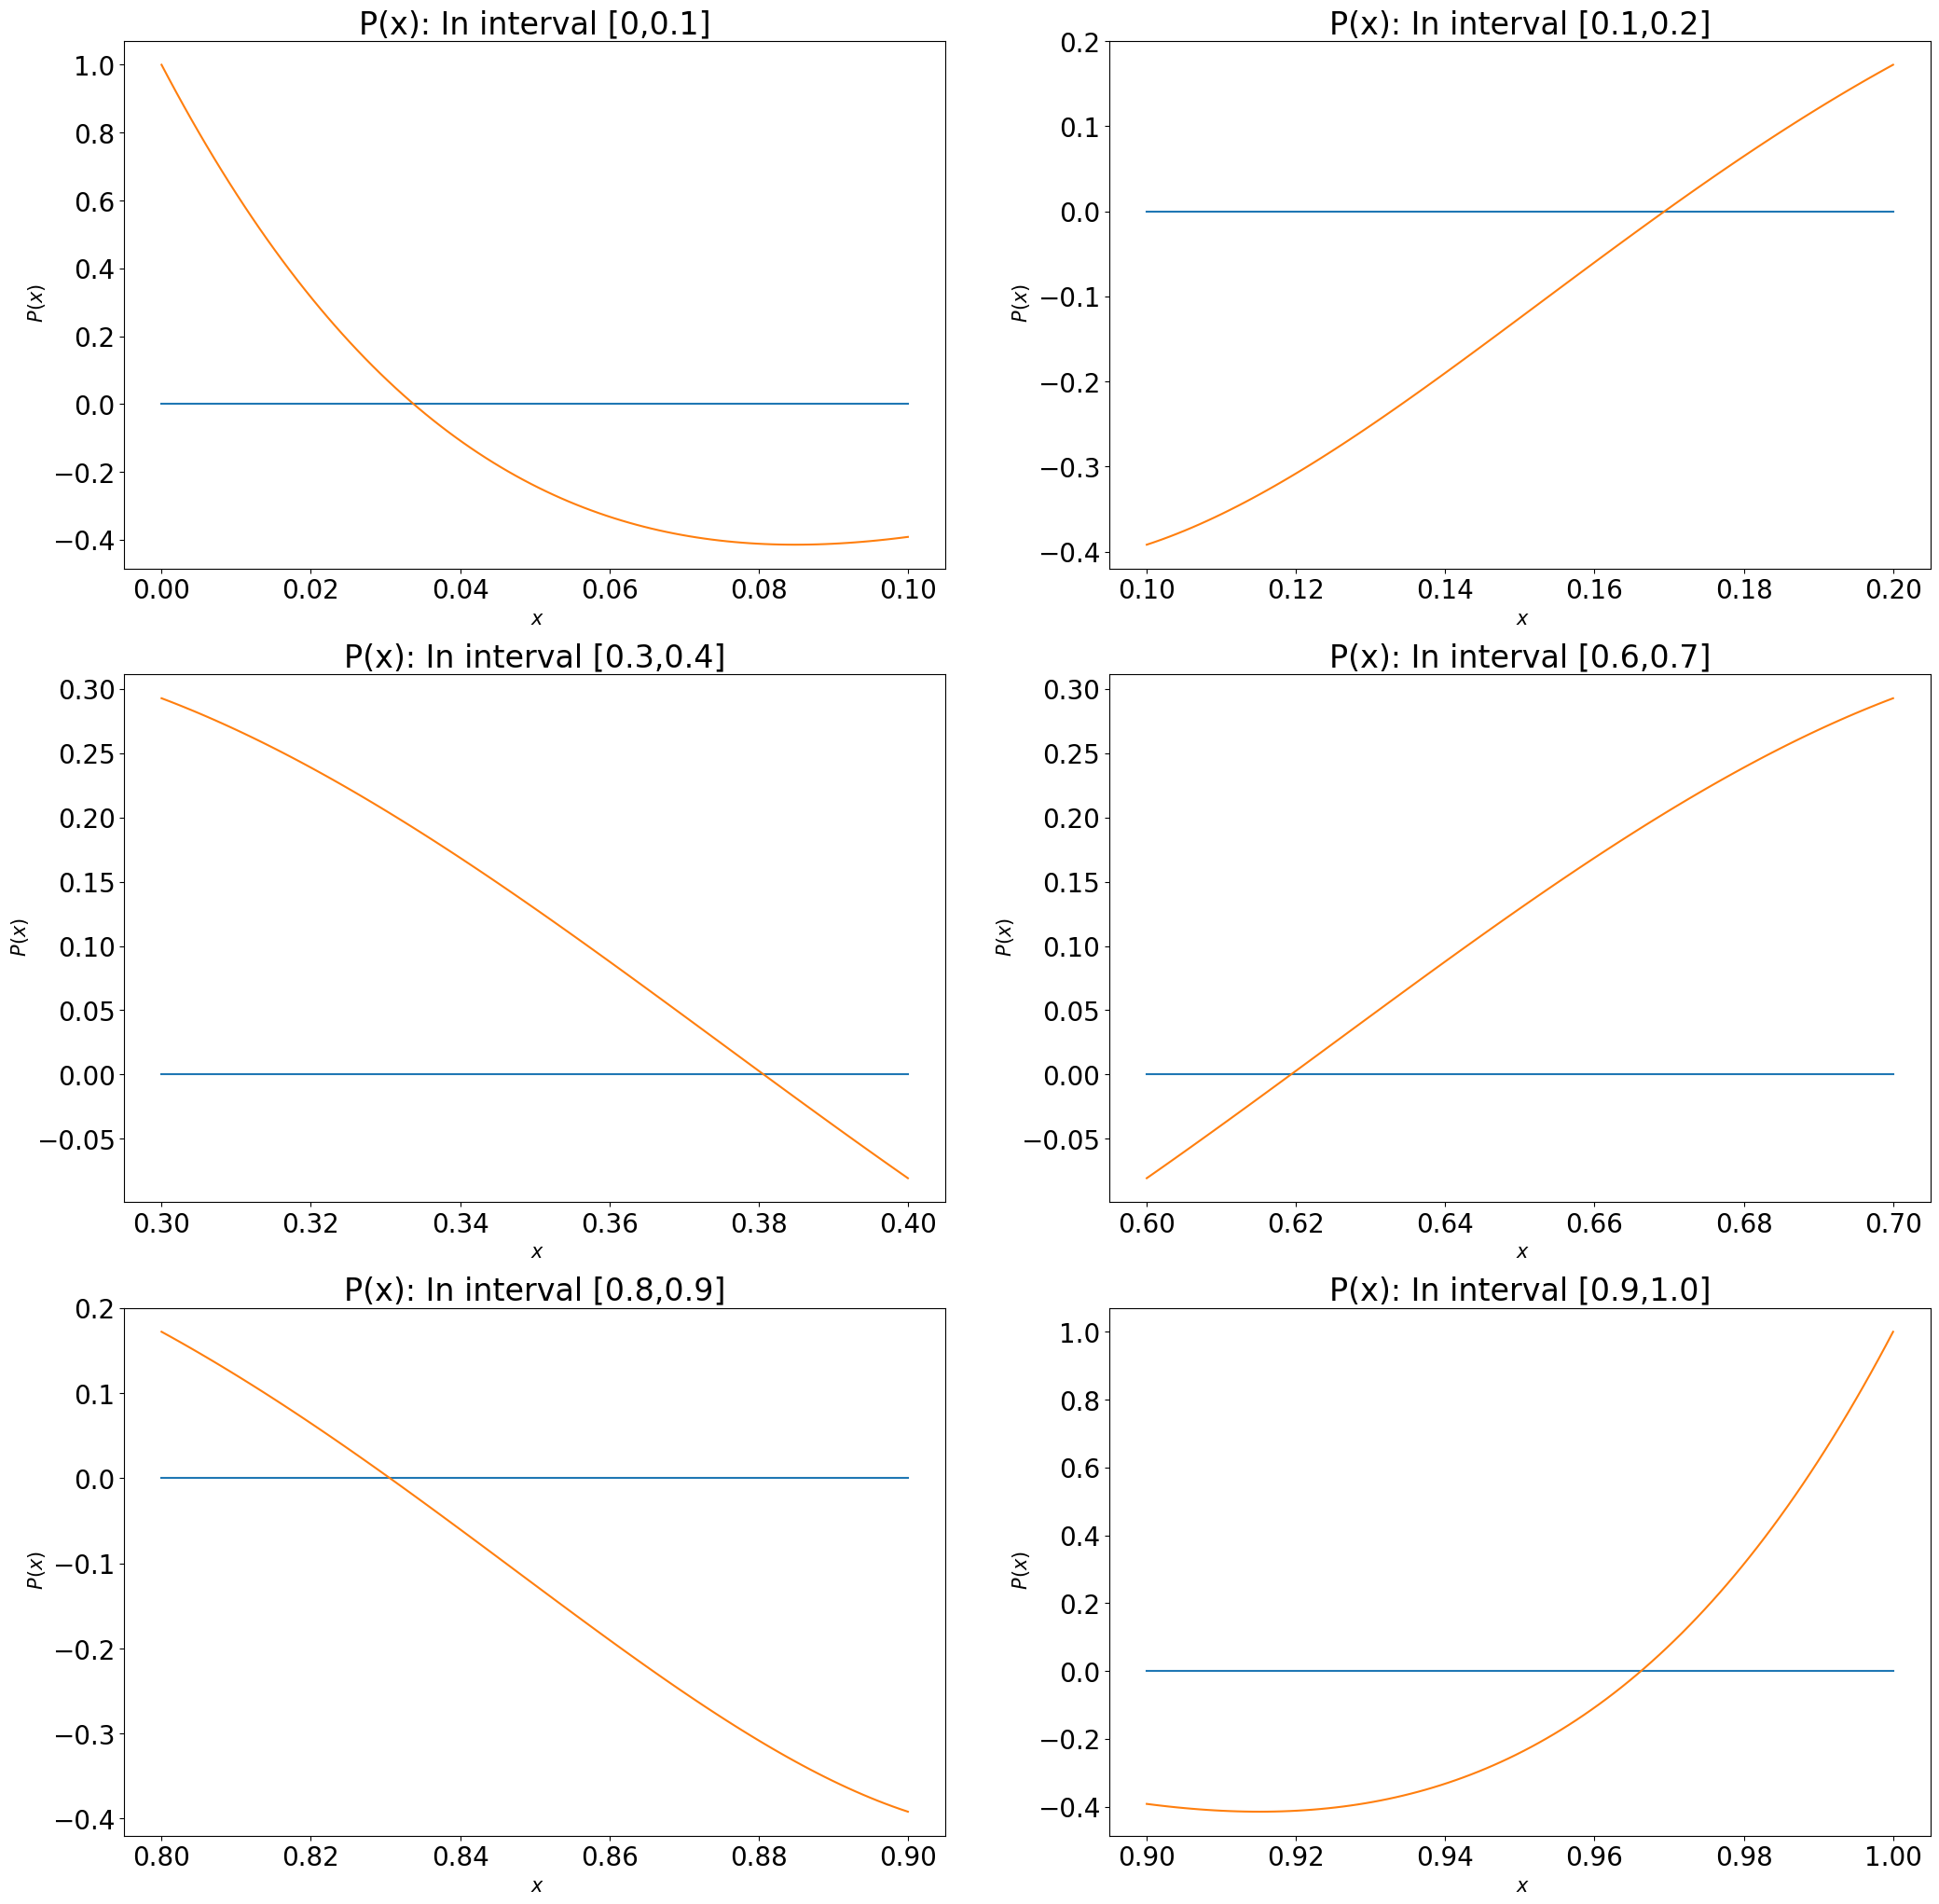

In [11]:
fig = plt.figure(figsize=(25,25))
plt.subplot(3,2,1)
y=[]
x_axis=[]
y_line=[]
for x in np.linspace(0,0.1,100):
    x_axis.append(x)
    y.append(P(x))
    y_line.append(x-x)
plt.plot(x_axis,y_line)
plt.plot(x_axis,y)
plt.xlabel(" $x$ ",fontsize=15)
plt.ylabel(" $P(x)$ ",fontsize=15)
plt.title('P(x): In interval [0,0.1]')

plt.subplot(3,2,2)
y=[]
x_axis=[]
y_line=[]
for x in np.linspace(0.1,0.2,100):
    x_axis.append(x)
    y.append(P(x))
    y_line.append(x-x)
plt.plot(x_axis,y_line)
plt.plot(x_axis,y)
plt.xlabel(" $x$ ",fontsize=15)
plt.ylabel(" $P(x)$ ",fontsize=15)
plt.title('P(x): In interval [0.1,0.2]')

plt.subplot(3,2,3)
y=[]
x_axis=[]
y_line=[]
for x in np.linspace(0.3,0.4,100):
    x_axis.append(x)
    y.append(P(x))
    y_line.append(x-x)
plt.plot(x_axis,y_line)
plt.plot(x_axis,y)
plt.xlabel(" $x$ ",fontsize=15)
plt.ylabel(" $P(x)$ ",fontsize=15)
plt.title('P(x): In interval [0.3,0.4]')

plt.subplot(3,2,4)
y=[]
x_axis=[]
y_line=[]
for x in np.linspace(0.6,0.7,100):
    x_axis.append(x)
    y.append(P(x))
    y_line.append(x-x)
plt.plot(x_axis,y_line)
plt.plot(x_axis,y)
plt.xlabel(" $x$ ",fontsize=15)
plt.ylabel(" $P(x)$ ",fontsize=15)
plt.title('P(x): In interval [0.6,0.7]')

plt.subplot(3,2,5)
y=[]
x_axis=[]
y_line=[]
for x in np.linspace(0.8,0.9,100):
    x_axis.append(x)
    y.append(P(x))
    y_line.append(x-x)
plt.plot(x_axis,y_line)
plt.plot(x_axis,y)
plt.xlabel(" $x$ ",fontsize=15)
plt.ylabel(" $P(x)$ ",fontsize=15)
plt.title('P(x): In interval [0.8,0.9]')

plt.subplot(3,2,6)
y=[]
x_axis=[]
y_line=[]
for x in np.linspace(0.9,1.0,100):
    x_axis.append(x)
    y.append(P(x))
    y_line.append(x-x)
plt.plot(x_axis,y_line)
plt.plot(x_axis,y)
plt.xlabel(" $x$ ",fontsize=15)
plt.ylabel(" $P(x)$ ",fontsize=15)
plt.title('P(x): In interval [0.9,1.0]')
plt.show()

By looking at the plots I can write down a rough estimate of all roots, so my best guess by just looking at the plots is:\
First root is at $x=0.035$ (approx.)\
Second root is at $x=0.17$ (approx.)\
Third root is at $x=0.38$ (approx.)\
Forth root is at $x=0.619$ (approx.)\
Fifth root is at $x=0.83$ (approx.)\
Sixth root is at $x=0.967$ (approx.)



$\textbf{Part b}: Newton's\hspace{2mm} Method$
\
Writing a pyhton program to solve for each root using Newton's Method. To use Newton's Method we need derivative of the function $$P(x)=924x^6-2772x^5+3150x^4-1680x^3+420x^2-42x+1$$ so let's first define the derivative then write a program using Newton's Method.

In [12]:
def dP(x):
    return 6*924*x**5-5*2772*x**4+4*3150*x**3-3*1680*x**2+2*420*x-42

In [13]:
### Defining Newton Method for the intervals where differential of function is not changing sign
def Newton_method(x_1,x_2,epsilon):    ### epsilon is the error or precision we want  
    Guess=(x_1+x_2)/2.0    
    num_guesses=0
    newguess=Guess-P(Guess)/dP(Guess)
    error=(newguess-Guess)
    print('For interval [',x_1,',',x_2,'], Initial x is', Guess, "P(x) is" , P(Guess), 'error = ', error)

    while abs(error) >epsilon:
        Guess=newguess
        newguess=Guess-(P(Guess))/(dP(Guess))
        error=(newguess-Guess)
        num_guesses+= 1
        print('In iteration ',num_guesses, ' x = ',Guess,' P(x) =',P(Guess),' error =', error)
    print('Number of iterations =', num_guesses)
    print('Final Solution i.e the root (x) at which P(x) is almost 0 is x =',newguess)
    print('At this point x, P(x) = ',P(newguess))

Now calling the function to find out roots in each interval for an accuracy of $10^{-10}$. My final solution in iteration of equation $x'=x-\frac{P(x)}{P'(x)}$ will be $x'$. So the error estimate for the final solution would not be printed out but for the last iteration you can see the error.

In [14]:
epsilon=1e-10  ### will be same for all interval
Newton_method(0,0.1,epsilon)  ###For interval [0,0.1] 

For interval [ 0 , 0.1 ], Initial x is 0.05 P(x) is -0.2411643124999998 error =  -0.021707168858744564
In iteration  1  x =  0.02829283114125544  P(x) = 0.11182457204015872  error = 0.005084812097217218
In iteration  2  x =  0.03337764323847266  P(x) = 0.007372516386511041  error = 0.00038546847597190764
In iteration  3  x =  0.033763111714444564  P(x) = 4.0314675979091774e-05  error = 2.1311190746831077e-06
In iteration  4  x =  0.03376524283351925  P(x) = 1.2277372452018653e-09  error = 6.490474130371737e-11
Number of iterations = 4
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.03376524289842399
At this point x, P(x) =  -2.220446049250313e-16


In [15]:
Newton_method(0.1,0.2,epsilon)  ###For interval [0.1, 0.2]

For interval [ 0.1 , 0.2 ], Initial x is 0.15000000000000002 P(x) is -0.1252863125000001 error =  0.019188109194260283
In iteration  1  x =  0.1691881091942603  P(x) = -0.001301224666898193  error = 0.00020709750778277747
In iteration  2  x =  0.16939520670204308  P(x) = -6.281140745301173e-07  error = 1.000648010285321e-07
In iteration  3  x =  0.1693953067668441  P(x) = -1.4832579608992091e-13  error = 2.3619994848900205e-14
Number of iterations = 3
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.16939530676686773
At this point x, P(x) =  0.0


In [16]:
Newton_method(0.3,0.4,epsilon)  ###For interval [0.3, 0.4]

For interval [ 0.3 , 0.4 ], Initial x is 0.35 P(x) is 0.12918118750000573 error =  0.031947883608190064
In iteration  1  x =  0.38194788360819004  P(x) = -0.005350525573643239  error = -0.0012583890086466654
In iteration  2  x =  0.3806894945995434  P(x) = 3.884704877776812e-06  error = 9.12358435134486e-07
In iteration  3  x =  0.3806904069579785  P(x) = 1.7887913372760522e-12  error = 4.2010839251815923e-13
Number of iterations = 3
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.3806904069583986
At this point x, P(x) =  1.0658141036401503e-14


In [17]:
Newton_method(0.6,0.7,epsilon)  ###For interval [0.6, 0.7]

For interval [ 0.6 , 0.7 ], Initial x is 0.6499999999999999 P(x) is 0.1291811875000093 error =  -0.03194788360818557
In iteration  1  x =  0.6180521163918143  P(x) = -0.005350525573543763  error = 0.0012583890086231841
In iteration  2  x =  0.6193105054004375  P(x) = 3.8847048529078165e-06  error = -9.123584293613263e-07
In iteration  3  x =  0.6193095930420082  P(x) = 1.7692514120426495e-12  error = -4.155564781171961e-13
Number of iterations = 3
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.6193095930415926
At this point x, P(x) =  -1.0302869668521453e-13


In [18]:
Newton_method(0.8,0.9,epsilon)  ###For interval [0.8, 0.9]

For interval [ 0.8 , 0.9 ], Initial x is 0.8500000000000001 P(x) is -0.1252863124999095 error =  -0.019188109194246294
In iteration  1  x =  0.8308118908057538  P(x) = -0.001301224667017209  error = -0.00020709750780179004
In iteration  2  x =  0.830604793297952  P(x) = -6.281138809072218e-07  error = -1.0006477013657644e-07
In iteration  3  x =  0.8306046932331819  P(x) = -2.8421709430404007e-13  error = -4.529709940470639e-14
Number of iterations = 3
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.8306046932331366
At this point x, P(x) =  -2.842170943040401e-14


In [19]:
Newton_method(0.9,1.0,epsilon)  ###For interval [0.9, 1.0]

For interval [ 0.9 , 1.0 ], Initial x is 0.95 P(x) is -0.2411643125002101 error =  0.02170716885876056
In iteration  1  x =  0.9717071688587605  P(x) = 0.11182457204052554  error = -0.005084812097231661
In iteration  2  x =  0.9666223567615289  P(x) = 0.007372516386325856  error = -0.000385468475962214
In iteration  3  x =  0.9662368882855666  P(x) = 4.031467653931031e-05  error = -2.131119104298307e-06
In iteration  4  x =  0.9662347571664623  P(x) = 1.2271996752133418e-09  error = -6.487632653318087e-11
Number of iterations = 4
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.966234757101586
At this point x, P(x) =  3.055333763768431e-13


$\textbf{Part c}: Secant\hspace{2mm} Method$
\
Finding the roots for the same function P(x) but this time using secant method. The way I defined the function, it would be pretty easy to change the differential $dP$ to numerical differential $\frac{P(x_1)-P(x_2)}{x_1-x_2}$

In [20]:
### Defining Secant Method for the intervals where differential of function is not changing sign
def Secant_method(x_1,x_2,epsilon):    ### epsilon is the error or precision we want  
    Guess=(x_1+x_2)/2.0 
    num_guesses=0
    df_p= (P(x_1)-P(x_2))/(x_1-x_2)     ###defined derivative numerically using finite difference
    newguess=Guess-P(Guess)/df_p
    error=(newguess-Guess)
    print('For interval [',x_1,',',x_2,'], Initial x is', Guess, "P(x) is" , P(Guess), 'error = ', error)

    while abs(error) > epsilon:
        df_p= (P(Guess)-P(newguess))/(Guess-newguess)
        Guess=newguess
        newguess=Guess-P(Guess)/df_p
        error=(newguess-Guess)
        num_guesses+= 1
        print('In iteration ',num_guesses, ' x = ',Guess,' P(x) =',P(Guess),' error =', error)
    print('Number of iterations =', num_guesses)
    print('Final Solution i.e the root (x) at which P(x) is almost 0 is x =',newguess)
    print('At this point x, P(x) = ',P(newguess))

In [21]:
epsilon=1e-10  ### will be same for all interval
Secant_method(0,0.1,epsilon)  

For interval [ 0 , 0.1 ], Initial x is 0.05 P(x) is -0.2411643124999998 error =  -0.017327561833774485
In iteration  1  x =  0.03267243816622552  P(x) = 0.02099598572369299  error = 0.0013877358370179699
In iteration  2  x =  0.03406017400324349  P(x) = -0.005555432094072943  error = -0.000290360095267915
In iteration  3  x =  0.03376981390797557  P(x) = -8.64595086604858e-05  error = -4.590330410218779e-06
In iteration  4  x =  0.033765223577565354  P(x) = 3.654732092517321e-07  error = 1.9322120778375584e-08
In iteration  5  x =  0.03376524289968613  P(x) = -2.3874680010749216e-11  error = -1.2621431677573014e-12
Number of iterations = 5
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.03376524289842399
At this point x, P(x) =  -2.220446049250313e-16


In [22]:
Secant_method(0.1,0.2,epsilon)  ###For interval [0.1, 0.2]

For interval [ 0.1 , 0.2 ], Initial x is 0.15000000000000002 P(x) is -0.1252863125000001 error =  0.022218139732431003
In iteration  1  x =  0.17221813973243102  P(x) = 0.01759601810510336  error = -0.002736173096686667
In iteration  2  x =  0.16948196663574436  P(x) = 0.0005438591498680978  error = -8.726711838438761e-05
In iteration  3  x =  0.16939469951735997  P(x) = -3.8117532197290416e-06  error = 6.073733652967039e-07
In iteration  4  x =  0.16939530689072527  P(x) = 7.774625387924061e-10  error = -1.2385736880560216e-10
In iteration  5  x =  0.1693953067668679  P(x) = 8.881784197001252e-16  error = -1.3877787807814457e-16
Number of iterations = 5
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.16939530676686776
At this point x, P(x) =  0.0


In [23]:
Secant_method(0.3,0.4,epsilon)  ###For interval [0.3, 0.4]

For interval [ 0.3 , 0.4 ], Initial x is 0.35 P(x) is 0.12918118750000573 error =  0.03461335313441305
In iteration  1  x =  0.384613353134413  P(x) = -0.016663072555854086  error = -0.003954662421813637
In iteration  2  x =  0.3806586907125994  P(x) = 0.0001350457345594691  error = 3.179286408488968e-05
In iteration  3  x =  0.3806904835766843  P(x) = -3.262304861806342e-07  error = -7.66170565880131e-08
In iteration  4  x =  0.3806904069596277  P(x) = -5.226041821515537e-12  error = -1.2274070648743418e-12
Number of iterations = 4
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.3806904069584003
At this point x, P(x) =  1.0658141036401503e-14


In [24]:
Secant_method(0.6,0.7,epsilon)  ###For interval [0.6, 0.7]

For interval [ 0.6 , 0.7 ], Initial x is 0.6499999999999999 P(x) is 0.1291811875000093 error =  -0.03461335313441549
In iteration  1  x =  0.6153866468655844  P(x) = -0.016663072555932246  error = 0.003954662421830291
In iteration  2  x =  0.6193413092874147  P(x) = 0.00013504573463052338  error = -3.179286410148752e-05
In iteration  3  x =  0.6193095164233132  P(x) = -3.2623042045543116e-07  error = 7.661704115591306e-08
In iteration  4  x =  0.6193095930403544  P(x) = -5.226041821515537e-12  error = 1.2273515537231106e-12
Number of iterations = 4
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.6193095930415817
At this point x, P(x) =  -7.460698725481052e-14


In [25]:
Secant_method(0.8,0.9,epsilon)  ###For interval [0.8, 0.9]

For interval [ 0.8 , 0.9 ], Initial x is 0.8500000000000001 P(x) is -0.1252863124999095 error =  -0.022218139732411823
In iteration  1  x =  0.8277818602675883  P(x) = 0.017596018105017208  error = 0.002736173096674288
In iteration  2  x =  0.8305180333642626  P(x) = 0.0005438591496584877  error = 8.72671183497209e-05
In iteration  3  x =  0.8306053004826123  P(x) = -3.811753067850532e-06  error = -6.07373341288131e-07
In iteration  4  x =  0.830604693109271  P(x) = 7.77575337451708e-10  error = 1.238753544186011e-10
In iteration  5  x =  0.8306046932331463  P(x) = -9.947598300641403e-14  error = -1.587618925213974e-14
Number of iterations = 5
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.8306046932331305
At this point x, P(x) =  -1.1368683772161603e-13


In [26]:
Secant_method(0.9,1.0,epsilon)  ###For interval [0.9, 1.0]

For interval [ 0.9 , 1.0 ], Initial x is 0.95 P(x) is -0.2411643125002101 error =  0.017327561833787586
In iteration  1  x =  0.9673275618337875  P(x) = 0.020995985724020727  error = -0.0013877358370378845
In iteration  2  x =  0.9659398259967497  P(x) = -0.005555432093835577  error = 0.00029036009525873485
In iteration  3  x =  0.9662301860920084  P(x) = -8.645950906327471e-05  error = 4.590330431986089e-06
In iteration  4  x =  0.9662347764224404  P(x) = 3.6547331916381154e-07  error = -1.93221265654131e-08
In iteration  5  x =  0.9662347571003138  P(x) = -2.4307666990353027e-11  error = 1.2850831510036187e-12
Number of iterations = 5
Final Solution i.e the root (x) at which P(x) is almost 0 is x = 0.9662347571015989
At this point x, P(x) =  4.476419235288631e-13


$Comparing\hspace{2mm} iterations\hspace{2mm} and \hspace{2mm}verifying\hspace{2mm} that\hspace{2mm} roots\hspace{2mm} from \hspace{2mm}both \hspace{2mm}methods \hspace{2mm}are\hspace{2mm} same:$

First defining Both Newton and Secant Method again to print out total number of iterations and final solution only for verification purposes.

In [27]:
def Newton_method_final_solution(x_1,x_2,epsilon):    ### epsilon is the error or precision we want  
    Guess=(x_1+x_2)/2.0    
    num_guesses=0
    newguess=Guess-P(Guess)/dP(Guess)
    error=(newguess-Guess)

    while abs(error) >epsilon:
        Guess=newguess
        newguess=Guess-(P(Guess))/(dP(Guess))
        error=(newguess-Guess)
        num_guesses+= 1
    print('Using Newton method, the number of iterations are', num_guesses,'and root of P(x) in this interval is ',newguess)


In [28]:
def Secant_method_final_solution(x_1,x_2,epsilon):    ### epsilon is the error or precision we want  
    Guess=(x_1+x_2)/2.0 
    num_guesses=0
    df_p= (P(x_1)-P(x_2))/(x_1-x_2)     ###defined derivative numerically using finite difference
    newguess=Guess-P(Guess)/df_p
    error=(newguess-Guess)

    while abs(error) >epsilon:
        df_p= (P(Guess)-P(newguess))/(Guess-newguess)
        Guess=newguess
        newguess=Guess-P(Guess)/df_p
        error=(newguess-Guess)
        num_guesses+= 1
    print('Using Secant method, the number of iterations are', num_guesses,'and root of P(x) in this interval is ',newguess)

Now defining a function which return final value of root for the given interval using both Newton and Secant Method defined in the above two cells.

In [29]:
def verification(x_1,x_2,epsilon):   ## This function will compare the iterations in both Newton and Secant method
    print('For the interval [',x_1,',',x_2,']')
    Newton_method_final_solution(x_1,x_2,epsilon)
    Secant_method_final_solution(x_1,x_2,epsilon)     

In [30]:
verification(0,0.1,epsilon)

For the interval [ 0 , 0.1 ]
Using Newton method, the number of iterations are 4 and root of P(x) in this interval is  0.03376524289842399
Using Secant method, the number of iterations are 5 and root of P(x) in this interval is  0.03376524289842399


In [31]:
verification(0.1,0.2,epsilon)

For the interval [ 0.1 , 0.2 ]
Using Newton method, the number of iterations are 3 and root of P(x) in this interval is  0.16939530676686773
Using Secant method, the number of iterations are 5 and root of P(x) in this interval is  0.16939530676686776


In [32]:
verification(0.3,0.4,epsilon)

For the interval [ 0.3 , 0.4 ]
Using Newton method, the number of iterations are 3 and root of P(x) in this interval is  0.3806904069583986
Using Secant method, the number of iterations are 4 and root of P(x) in this interval is  0.3806904069584003


In [33]:
verification(0.1,0.2,epsilon)

For the interval [ 0.1 , 0.2 ]
Using Newton method, the number of iterations are 3 and root of P(x) in this interval is  0.16939530676686773
Using Secant method, the number of iterations are 5 and root of P(x) in this interval is  0.16939530676686776


In [34]:
verification(0.6,0.7,epsilon)

For the interval [ 0.6 , 0.7 ]
Using Newton method, the number of iterations are 3 and root of P(x) in this interval is  0.6193095930415926
Using Secant method, the number of iterations are 4 and root of P(x) in this interval is  0.6193095930415817


In [35]:
verification(0.8,0.9,epsilon)

For the interval [ 0.8 , 0.9 ]
Using Newton method, the number of iterations are 3 and root of P(x) in this interval is  0.8306046932331366
Using Secant method, the number of iterations are 5 and root of P(x) in this interval is  0.8306046932331305


In [36]:
verification(0.9,1.0,epsilon)

For the interval [ 0.9 , 1.0 ]
Using Newton method, the number of iterations are 4 and root of P(x) in this interval is  0.966234757101586
Using Secant method, the number of iterations are 5 and root of P(x) in this interval is  0.9662347571015989


# Problem#3 Newman 6.18: The temperature of a light bulb, golden ratio search

$\textbf{Part a}$


Plotting $\eta$ as a function of temperature.

$$\eta=\frac{15}{\pi^4}\int_{hc/\lambda_2k_BT}^{hc/\lambda_1k_BT}\frac{x^3}{e^x-1}dx$$

To calculate this integral I will gaussian quadrature with 1000 points as suggested in the problem.

In [37]:
from gaussxw import gaussxw 

In [38]:
###defining integrand I(x)
def I(x):
    return x**3/(np.expm1(x))

In [39]:
## wavelengths are given to us. Constants h,c, and k_B I am using are imported from scipy.constants
Lambda_1=390e-9
Lambda_2=750e-9
x,w=gaussxw(1000) ### Gaussian integration points (x) and weights (w) for 1000 points
def eta(T):
    a=(h*c)/(Lambda_2*k*T)
    b=(h*c)/(Lambda_1*k*T)
    xx=0.5*(b-a)*x+0.5*(b+a)     ## Integration points for the limits of integration a,b
    ww=0.5*(b-a)*w               ##wieghts w mapped with integration limit
    integral=np.sum(ww*I(xx))
    return (15/(np.pi)**4)*integral

Now using the function $\eta(T)$ defined in the cell above making a plot of $\eta$ as a function of temperature between 300 K and 10 000 K

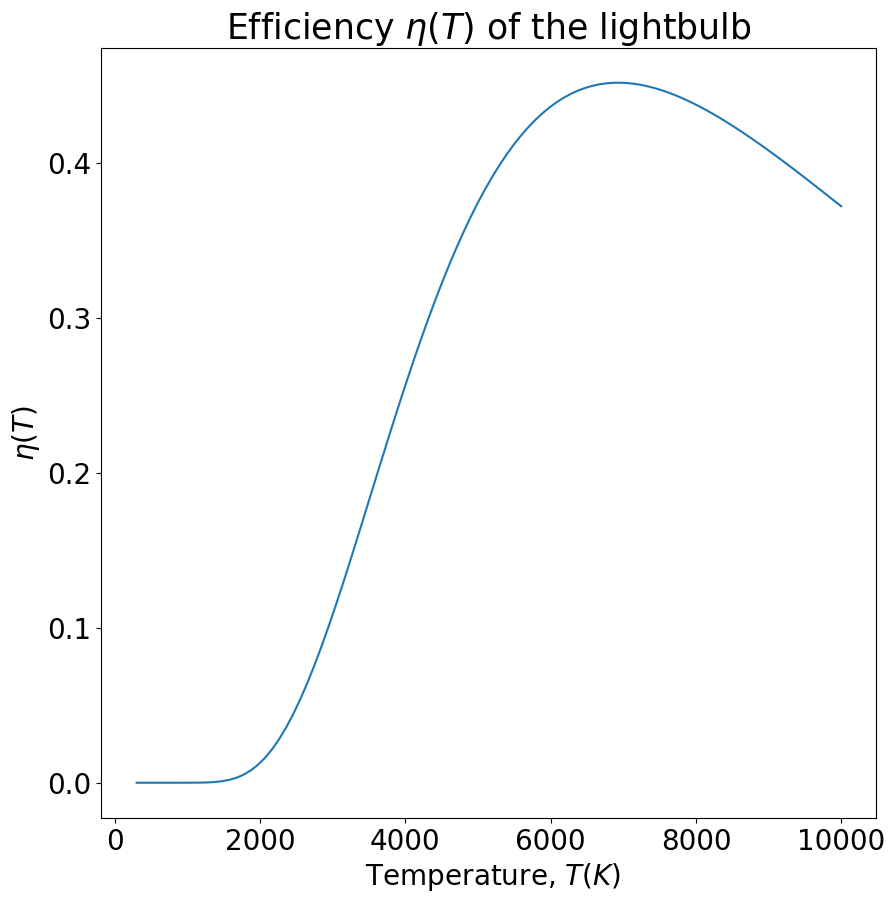

In [40]:
fig = plt.figure(figsize=(10,10))
plt.xlabel(" Temperature, $T(K)$")
plt.ylabel('$\eta(T)$')
plt.title('Efficiency $\eta(T)$ of the lightbulb', fontsize=25)
x_T=np.linspace(300,10000,100)
y_eta=np.zeros_like(x_T)
for i in range(len(x_T)):
    y_eta[i]=eta(x_T[i])
plt.plot(x_T,y_eta)
plt.show()

$\textbf{Part b}$


Calculating the temperature of maximum efficiency of the light bulb using golden ratio search.

In [41]:
from scipy.constants import golden

def Golden_ratio(T1,T4,Epsilon): #As suggested in the problem Epsilon is 1e-4 i.e few kelvin in ten thousands
    
    ##Initial position of four points
    ##T1=function's input
    ##T4= function's input
    T2=T4-(T4-T1)/golden
    T3=T1+(T4-T1)/golden

    ##Initial values of the function at the four points
    eta1=eta(T1)
    eta2=eta(T2)
    eta3=eta(T3)
    eta4=eta(T4)
    n_loops=0
    print('Started with search interval [',T1,',',T4,']')
    while abs(T4-T1)>Epsilon:
        if eta2>eta3:
            T4,eta4=T3,eta3
            T3,eta3=T2,eta2
            T2=T4-(T4-T1)/golden
            eta2=eta(T2)
        else:
            T1,eta1=T2,eta2
            T2,eta2=T3,eta3
            T3=T1+(T4-T1)/golden
            eta3=eta(T3)
        n_loops+=1
        print('In iteration ',n_loops,' search interval is [',T1,',',T4,']')
    ##printing the results
    print('The maximum efficiency is at T= ',0.5*(T1+T4),' kelvin, and \nthe efficiency at this temperature is η(T)= ',eta(0.5*(T1+T4)))
        
        


In [42]:
Golden_ratio(5000,8000,1e-4)  ## By looking at the plot eta(T), I will take T1=5000, and T4=8000 and Epsilon =1e-4

Started with search interval [ 5000 , 8000 ]
In iteration  1  search interval is [ 6145.898033750315 , 8000 ]
In iteration  2  search interval is [ 6145.898033750315 , 7291.796067500631 ]
In iteration  3  search interval is [ 6583.592135001261 , 7291.796067500631 ]
In iteration  4  search interval is [ 6583.592135001261 , 7021.286236252208 ]
In iteration  5  search interval is [ 6750.776405003785 , 7021.286236252208 ]
In iteration  6  search interval is [ 6854.101966249685 , 7021.286236252208 ]
In iteration  7  search interval is [ 6854.101966249685 , 6957.4275274955835 ]
In iteration  8  search interval is [ 6893.568818738959 , 6957.4275274955835 ]
In iteration  9  search interval is [ 6917.9606750063085 , 6957.4275274955835 ]
In iteration  10  search interval is [ 6917.9606750063085 , 6942.352531273659 ]
In iteration  11  search interval is [ 6917.9606750063085 , 6933.035671228234 ]
In iteration  12  search interval is [ 6923.718811182807 , 6933.035671228234 ]
In iteration  13  searc

Now let me draw a horizontal line where $\eta(T)$ is maximum to confirm the results.

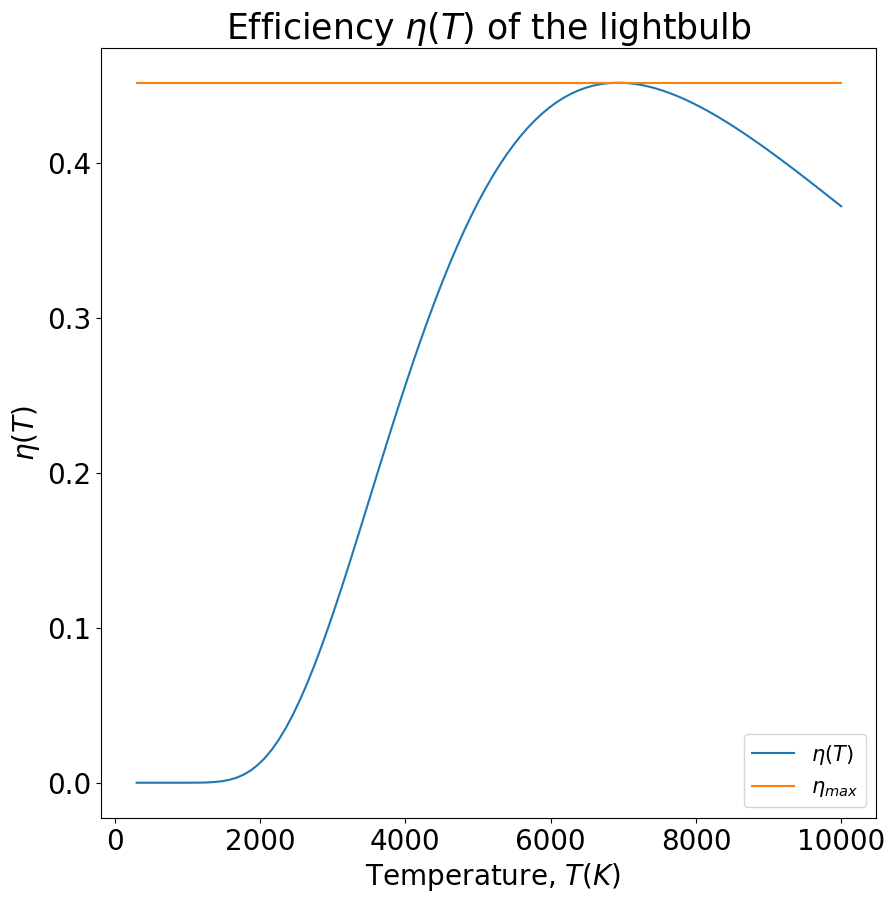

In [43]:
fig = plt.figure(figsize=(10,10))
plt.xlabel(" Temperature, $T(K)$")
plt.ylabel('$\eta(T)$')
plt.title('Efficiency $\eta(T)$ of the lightbulb', fontsize=25)
x_T=np.linspace(300,10000,100)
y_eta=np.zeros_like(x_T)
eta_T_max=np.full_like(x_T, 0.4516938402945063)
for i in range(len(x_T)):
    y_eta[i]=eta(x_T[i])
plt.plot(x_T,y_eta,label='$\eta(T)$')
plt.plot(x_T,eta_T_max,label='$\eta_{max}$')
plt.legend(loc='best',fontsize=15)
plt.show()

$\textbf{Part c}$


$\textbf{Question:}$ Is it practical to run a tungsten-filament light bulb at the temperature you found? If
not, why not?

$\textbf{Answer:}$ No, because tungsten has a melting point at 3695 K. So if we try to glow it beyond 3695 K it will start melting, though it will vaporise eventually as it's boiling point is also less than the temperature required for $\eta_{max}$. So if you want to glow a light bulb for maximum efficiency light radiation in visible spectrum then pick some other element whose melting point is greater than 7000 K. 
